# Дмитрий Ильин
# Современные модели машинного обучения - домашнее задание №4
Я пытался заставить работать несколько различных моделей из статьи https://github.com/ai-forever/fbc3_aij2023/blob/main/SOTA_SURVEY.md однако в итоге только с MiniGPT-4 добился успехов. Для всех остальных моделей мне либо не хватало доступных ресурсов после установки, либо они неадекватно работали при попытке уменьшить объем используемых ресурсов.



# 1. Установка MiniGPT-4

Исправление ошибки "TF-TRT Warning: Could not find TensorRT":

In [1]:
!git clone -b 7b https://github.com/camenduru/minigpt4
!wget https://huggingface.co/ckpt/minigpt4-7B/resolve/main/prerained_minigpt4_7b.pth -O /content/minigpt4/checkpoint.pth
!wget https://huggingface.co/ckpt/minigpt4/resolve/main/blip2_pretrained_flant5xxl.pth -O /content/minigpt4/blip2_pretrained_flant5xxl.pth

!pip install -q salesforce-lavis
!pip install -q bitsandbytes
!pip install -q accelerate
!pip install -q gradio==3.27.0
!pip install -q git+https://github.com/huggingface/transformers.git -U

Cloning into 'minigpt4'...
remote: Enumerating objects: 372, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 372 (delta 77), reused 70 (delta 70), pack-reused 282
Receiving objects: 100% (372/372), 13.41 MiB | 17.21 MiB/s, done.
Resolving deltas: 100% (171/171), done.
Error downloading object: blip2_pretrained_flant5xxl.pth (4b3839e): Smudge error: Error downloading blip2_pretrained_flant5xxl.pth (4b3839ea6c617f315ead9bf4036bbb0f0cf6bf62695ecfc14968ea626af03a29): [4b3839ea6c617f315ead9bf4036bbb0f0cf6bf62695ecfc14968ea626af03a29] Object does not exist on the server: [404] Object does not exist on the server

Errors logged to /content/minigpt4/.git/lfs/logs/20231115T163448.951270039.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: blip2_pretrained_flant5xxl.pth: smudge filter lfs failed
You can inspect what was checked out with 'git status'
and retry with 'git rest

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


# 2. Работа с моделью

In [12]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)


Wed Nov 15 16:39:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
%cd /content/minigpt4
!python app.py

/content/minigpt4
Initializing Chat
(…)cased/resolve/main/tokenizer_config.json: 100% 28.0/28.0 [00:00<00:00, 162kB/s]
(…)bert-base-uncased/resolve/main/vocab.txt: 100% 232k/232k [00:00<00:00, 29.1MB/s]
(…)base-uncased/resolve/main/tokenizer.json: 100% 466k/466k [00:00<00:00, 136MB/s]
(…)rt-base-uncased/resolve/main/config.json: 100% 570/570 [00:00<00:00, 3.36MB/s]
Loading VIT
100% 1.89G/1.89G [01:34<00:00, 21.5MB/s]
Loading VIT Done
Loading Q-Former
100% 413M/413M [00:20<00:00, 20.9MB/s]
Loading Q-Former Done
Loading LLAMA
(…)T4-7B/resolve/main/tokenizer_config.json: 100% 727/727 [00:00<00:00, 3.81MB/s]
tokenizer.model: 100% 500k/500k [00:00<00:00, 53.2MB/s]
(…)-7B/resolve/main/special_tokens_map.json: 100% 411/411 [00:00<00:00, 1.91MB/s]
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to 

## Картинка №1

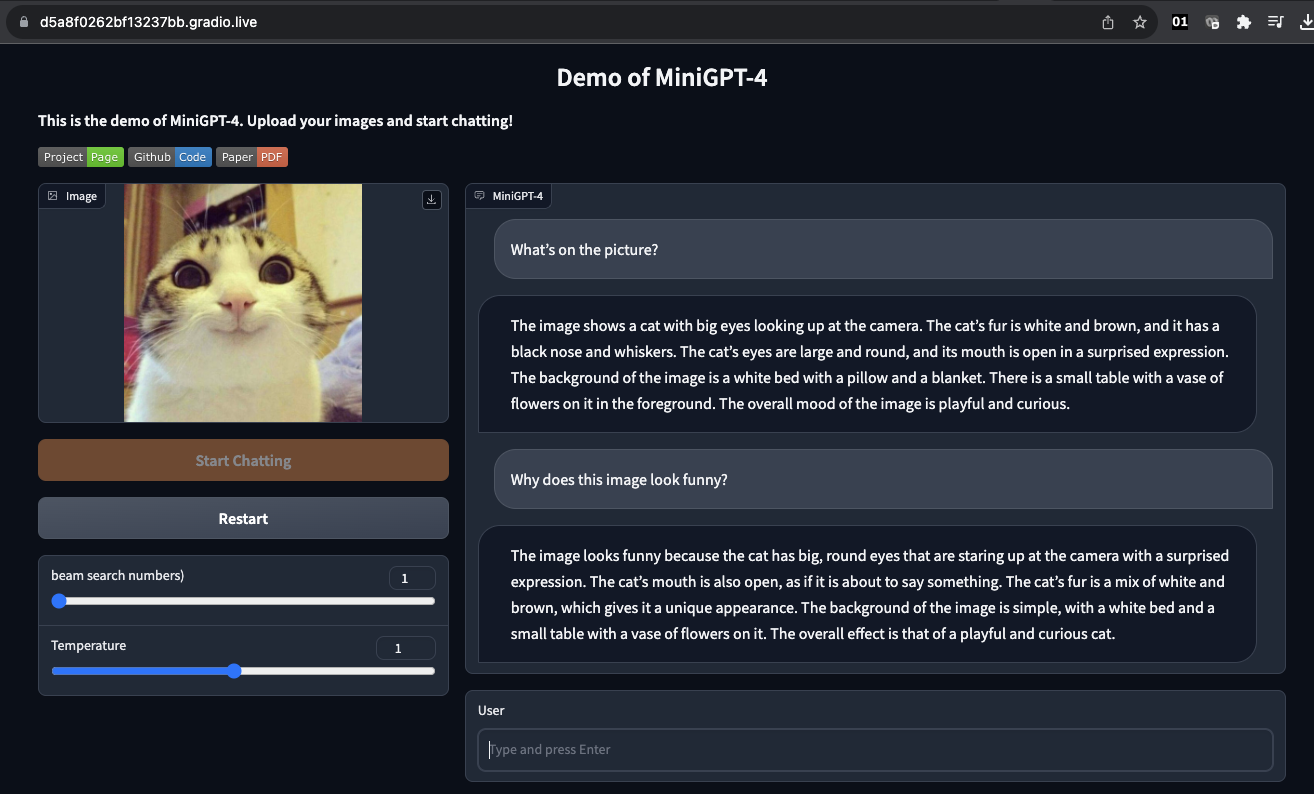

## Картинка №2

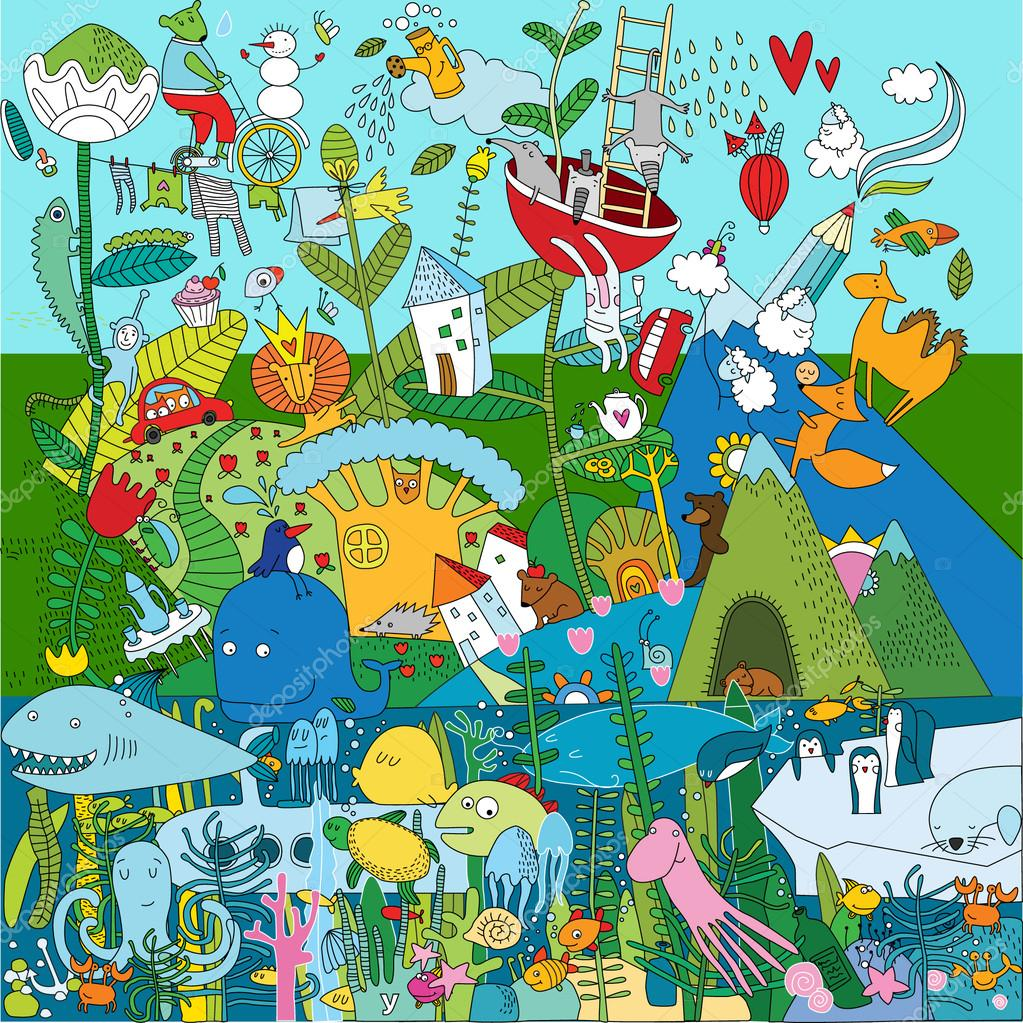

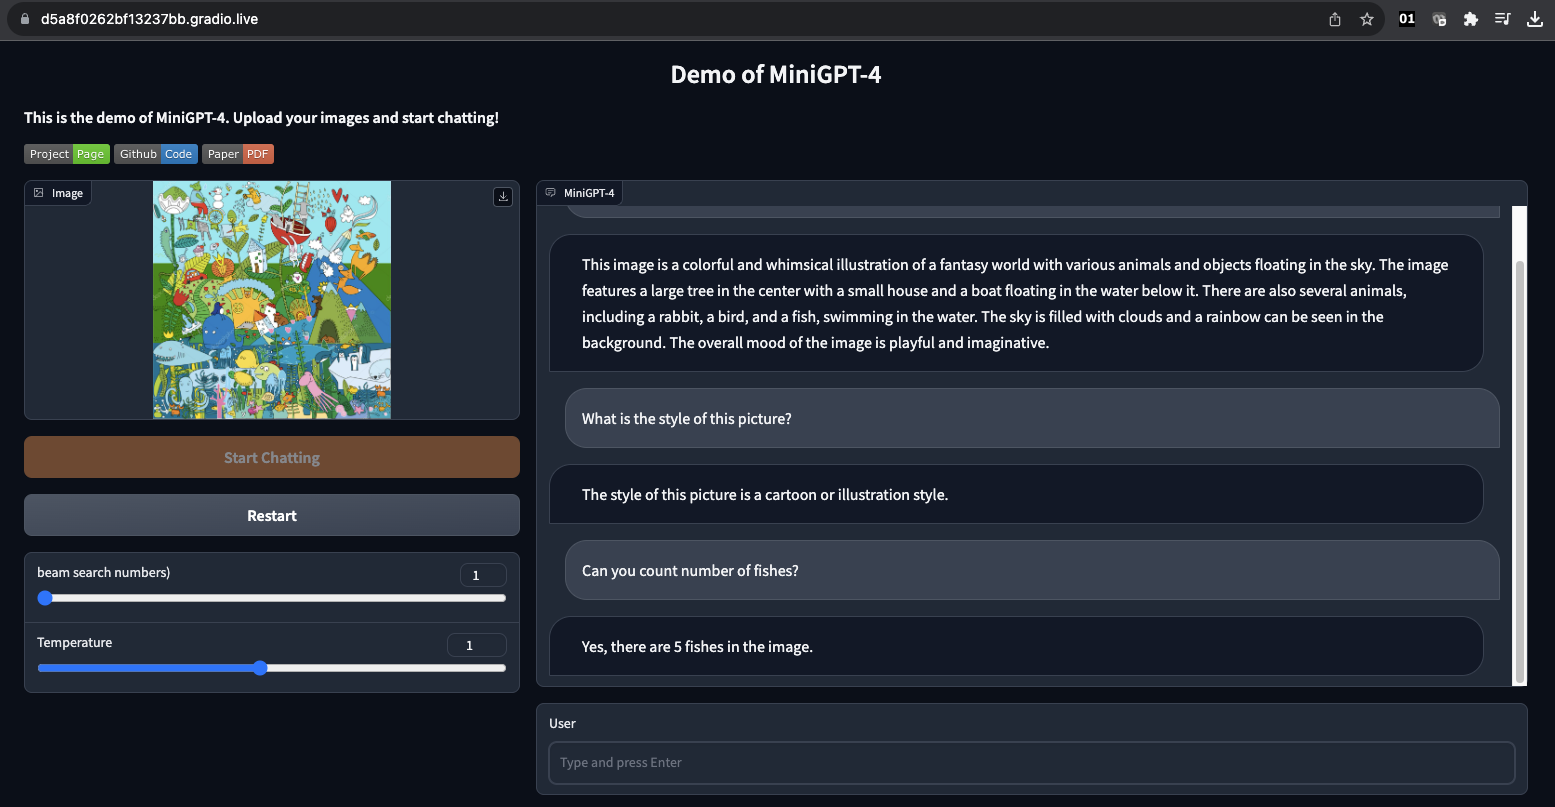

# 3. Выводы

Как я уже отметил в начале, все описанные в оригинальной статье модели требуют значительных ресурсов для запуска, однако, при наличии, например, платного Google Colab с А100, их всех скорее всего будет можно использовать (пройдя предварительную и долгую процедуру установки, конечно же). \
MiniGPT-4 прямо очень хорошо показывает себя в мультимодальных задачах текстового описания изображений, при этом будучи запущенной (не без труда) на T4. \
В дальнейшем хотелось бы все-таки запустить более тяжеловесные модели и оценить работу ML-инженеров по достоинству.